In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
Faculty_info=pd.read_csv('salaries.csv')


In [2]:
Faculty_info.columns

Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'], dtype='object')

In [3]:
X1=Faculty_info[['phd','service']].values
X1


array([[11, 11],
       [12,  6],
       [23, 20],
       [40, 31],
       [20, 18],
       [20, 20],
       [20, 17],
       [18, 18],
       [29, 19],
       [51, 51],
       [39, 22],
       [23, 23]], dtype=int64)

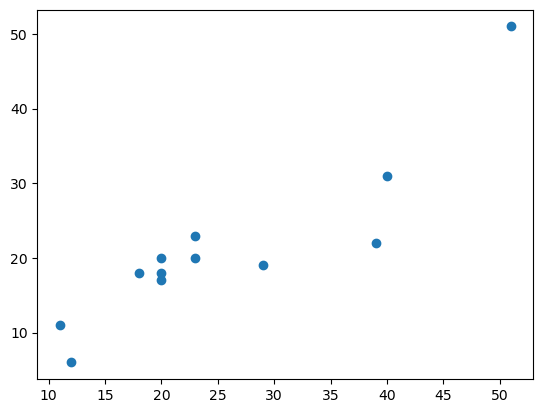

In [4]:
plt.scatter(X1[:,0],X1[:,1])

In [5]:
Y=Faculty_info ['salary'].values
Y


array([103613,   9300, 110515, 131205, 104800, 122400,  81285, 126300,
        94350,  57800, 128250, 134778], dtype=int64)

In [6]:
from sklearn import cluster


In [11]:
cls_faculty = cluster.KMeans(n_clusters = 3)
cls_faculty.fit(X1)


C:\Users\MAHE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MAHE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [12]:
print(cls_faculty.labels_)


[0 0 0 2 0 0 0 0 0 1 2 0]


In [13]:
print(cls_faculty.cluster_centers_)


[[19.55555556 16.88888889]
 [51.         51.        ]
 [39.5        26.5       ]]


In [14]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X1, cls_faculty.labels_))


0.5310004169134627


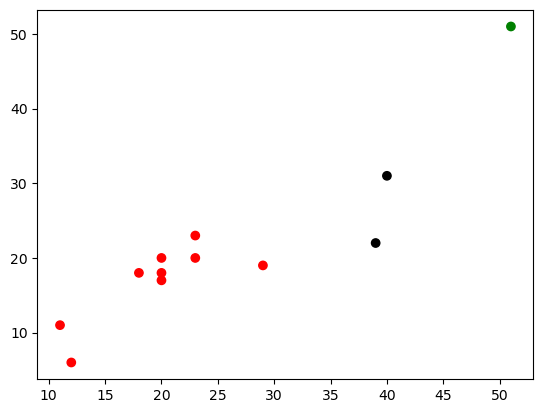

In [16]:
Faculty_info['label']=cls_faculty.labels_
colors = {0:'red', 1:'green', 2:'black'}

plt.scatter(Faculty_info['phd'], Faculty_info['service'], c=[colors[i] for i in Faculty_info['label']])

In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data
Y = iris.target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
import sklearn.model_selection as ms
XTrain, XTest, YTrain, YTest = ms.train_test_split(X, Y, test_size= 0.3, random_state=7)



In [5]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV


In [6]:
k_neighbours = list(range(1,21,2))
n_grid = [{'n_neighbors': k_neighbours}]
n_grid


[{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}]

In [7]:
model = neighbors.KNeighborsClassifier()
cv_knn = GridSearchCV(estimator=model,param_grid=n_grid,cv=ms.KFold(n_splits=10))  
cv_knn.fit(XTrain, YTrain)


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}])

In [8]:
best_k = cv_knn.best_params_['n_neighbors']


In [9]:
print('The best parameter is k={0}'.format(best_k))


The best parameter is k=11


In [21]:
mammals = pd.read_csv('mammals.csv',sep=',')

mammals


,species,body_weight,brain_weight,slow_wave,paradox,total_sleep,lifespan,gestation,predation,exposure,danger
0,African elephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
1,African giant pouched rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
2,Arctic fox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
3,Arctic ground squirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3
4,Asian elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
...,...,...,...,...,...,...,...,...,...,...,...
57,Tree hyrax,2.000,12.3,4.9,0.5,5.4,7.5,200.0,3,1,3
58,Tree shrew,0.104,2.5,13.2,2.6,15.8,2.3,46.0,3,2,2
59,Vervet,4.190,58.0,9.7,0.6,10.3,24.0,210.0,4,3,4
60,Water opossum,3.500,3.9,12.8,6.6,19.4,3.0,14.0,2,1,1


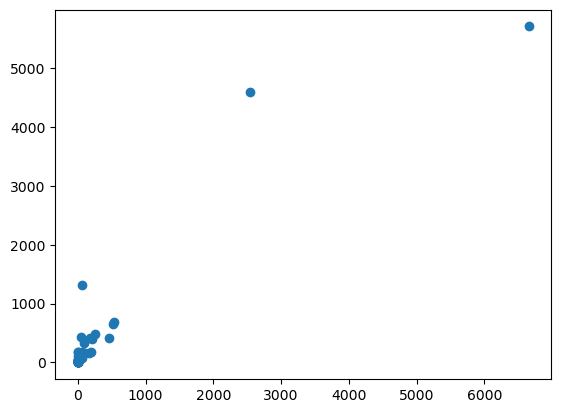

In [22]:
plt.scatter(mammals['body_weight'], mammals['brain_weight'])

In [23]:
body_data = mammals['body_weight']
body_data.shape

(62,)

In [24]:
brain_data = mammals['brain_weight']
brain_data.shape

(62,)

In [25]:
from sklearn import linear_model
sk_regr = linear_model.LinearRegression() 


In [26]:
import statsmodels.api as sm
body_data = sm.add_constant(body_data)

In [27]:
reg1=sk_regr.fit(body_data, brain_data)
reg1


LinearRegression()

In [28]:
print(sk_regr.coef_)


[0.         0.96649637]


In [29]:
print(sk_regr.intercept_)


91.00439620740687


In [30]:
print(sk_regr.score(body_data, brain_data))


0.8726620843043331


In [31]:
new_body = np.linspace(0, 7000, 10)
new_body


array([   0.        ,  777.77777778, 1555.55555556, 2333.33333333,
       3111.11111111, 3888.88888889, 4666.66666667, 5444.44444444,
       6222.22222222, 7000.        ])